## Data Preparation

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("train.csv")
print("train shape : ", train.shape)

train shape :  (891, 12)


In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Missing Value
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Missing values(train set)')

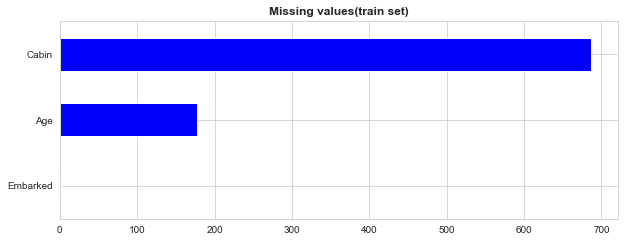

In [9]:
#Missing Value

train1 = train[train.columns[train.isnull().sum()!=0]]
# test1 = test[test.columns[test.isnull().sum()!=0]]
na_prop1 = (train1.isnull().sum()).sort_values()
# na_prop2 = (test1.isnull().sum()).sort_values()
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
plt.subplot(211)
na_prop1.plot.barh(color='blue')
plt.title('Missing values(train set)', weight='bold')
# plt.subplot(212)
# na_prop2.plot.barh(color='blue')
# plt.title('Missing values(test set)', weight='bold' )

# EDA

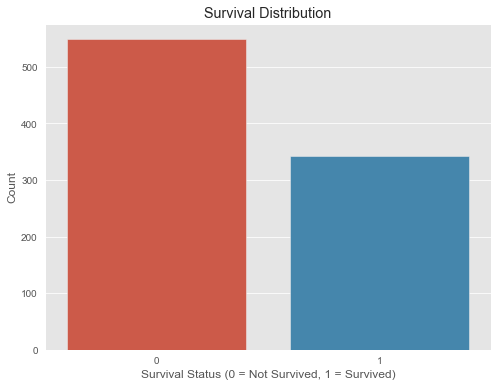

In [15]:
# Survival distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train)
plt.title('Survival Distribution')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived)')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Ratio of Survived')

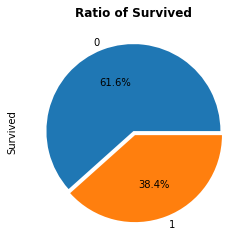

In [6]:
# Ratio of Survived
train["Survived"].value_counts().plot(kind="pie",explode=[0,0.05],autopct='%1.1f%%')
plt.title("Ratio of Survived",weight = "bold")

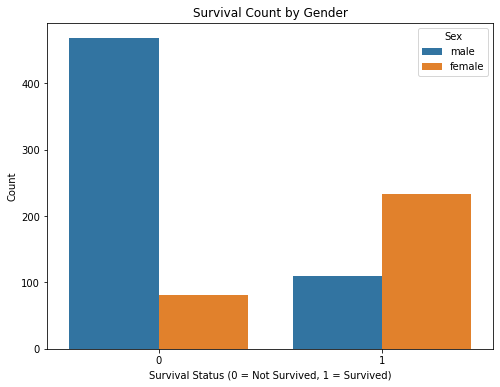

In [7]:
# Plot the count of survivors based on gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival Count by Gender')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived)')
plt.ylabel('Count')
plt.show()

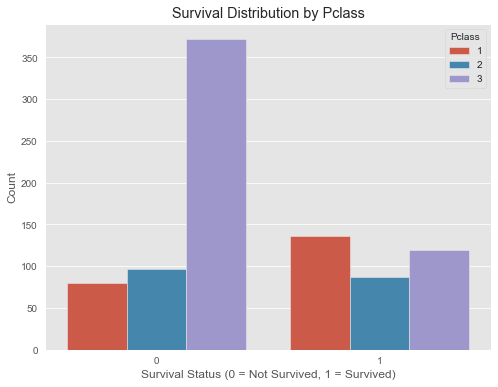

In [17]:
# Survival distribution by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title('Survival Distribution by Pclass')
plt.xlabel('Survival Status (0 = Not Survived, 1 = Survived)')
plt.ylabel('Count')
plt.show()


<AxesSubplot: xlabel='Pclass', ylabel='Sex'>

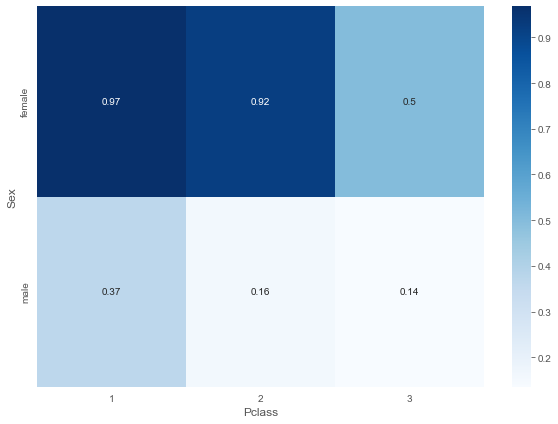

In [24]:
#Survial rate by Sex and Pclass

train_group = train.groupby(['Pclass','Sex'])['Survived'].mean()

plt.figure(figsize=(10,7))
sns.heatmap(train_group.unstack("Pclass"), cmap='Blues', annot=True)

<AxesSubplot: xlabel='Pclass', ylabel='Embarked'>

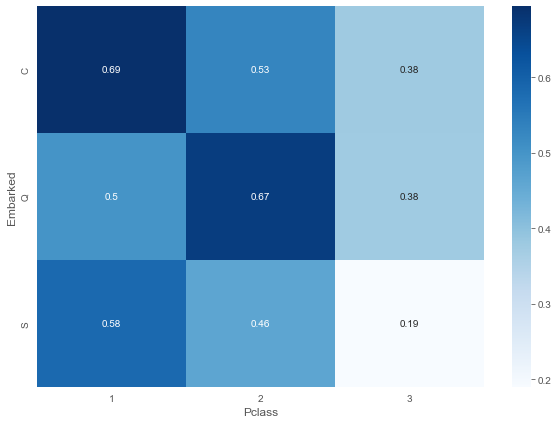

In [25]:
#Survial rate by Embarked and Pclass

train_group = train.groupby(['Pclass','Embarked'])['Survived'].mean()
plt.figure(figsize=(10,7))
sns.heatmap(train_group.unstack("Pclass"), cmap='Blues', annot=True)

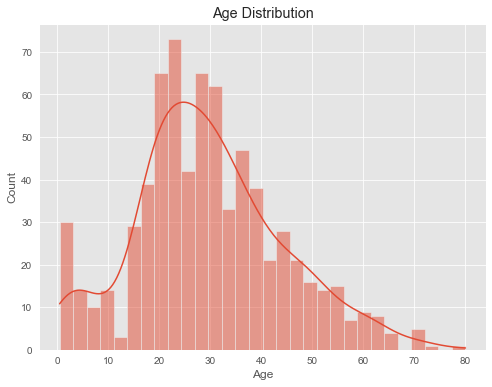

In [18]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

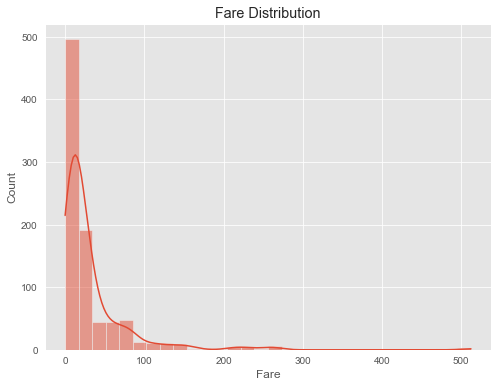

In [19]:
# Fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_19856\919767078.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train["Survived"]==0][col],color='red')
C:\Users\ahmed\AppData\Local\Temp\ipykernel_19856\919767078.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train["Survived"]==

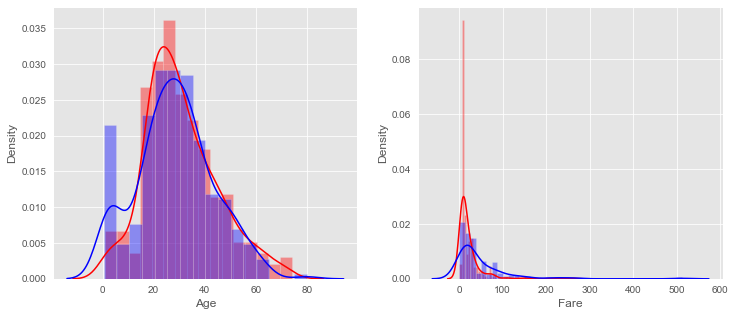

In [10]:
#People SibSp and Parch with 0 and Pclass with 3 has low survival rate.


train1 = train.select_dtypes(include = "float")
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
for i, col in enumerate(train1.columns):
    plt.subplot(1,2,i+1)
    sns.distplot(train[train["Survived"]==0][col],color='red')
    sns.distplot(train[train["Survived"]==1][col],color='blue')

C:\Users\ahmed\AppData\Local\Temp\ipykernel_19856\1421217623.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')


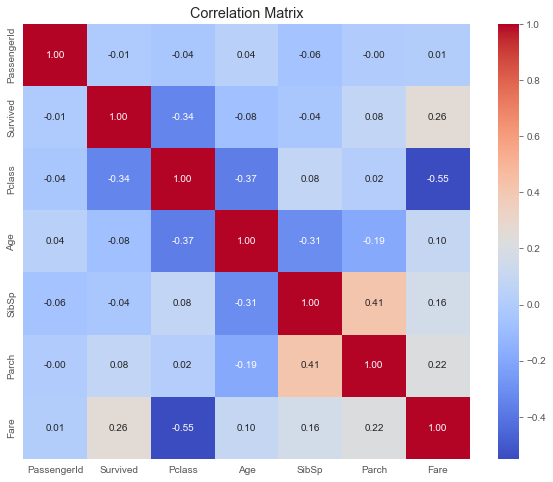

In [20]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot: xlabel='Age_group', ylabel='count'>

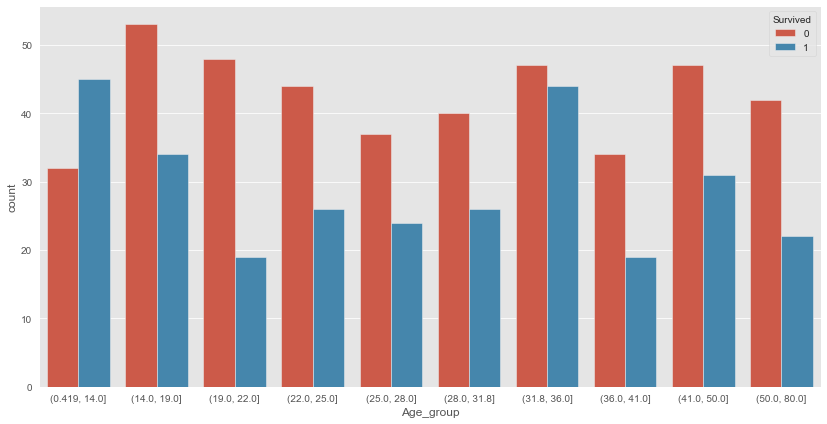

In [11]:
#count by age-group
train['Age_group'] = pd.qcut(train['Age'], 10)
plt.figure(figsize=(14,7))
sns.countplot(x='Age_group', hue='Survived', data=train)

In [12]:
train['Name'].head()


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [13]:
train['First_Name'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train['First_Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: First_Name, dtype: int64

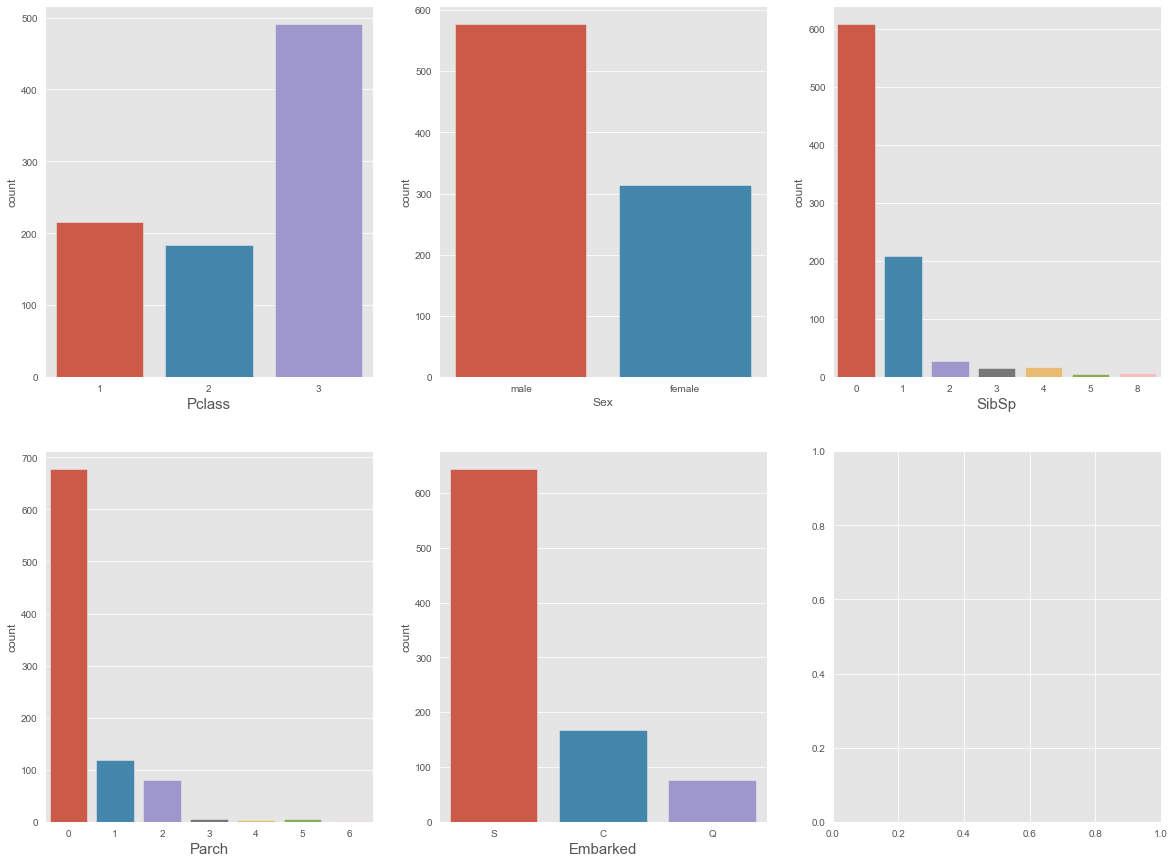

In [21]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
nrow = 2
ncol = 3

# Create subplots
f, axes = plt.subplots(nrow, ncol, figsize=(20, 15))

# Loop through features and create count plots
for idx, feature in enumerate(features):
    plt.subplot(nrow, ncol, idx + 1)
    
    if feature == 'Sex':
        sns.countplot(x=train[feature])
    else:
        sns.countplot(x=feature, data=train)
        plt.xlabel(feature, fontsize=15)

# Show the plots
plt.show()


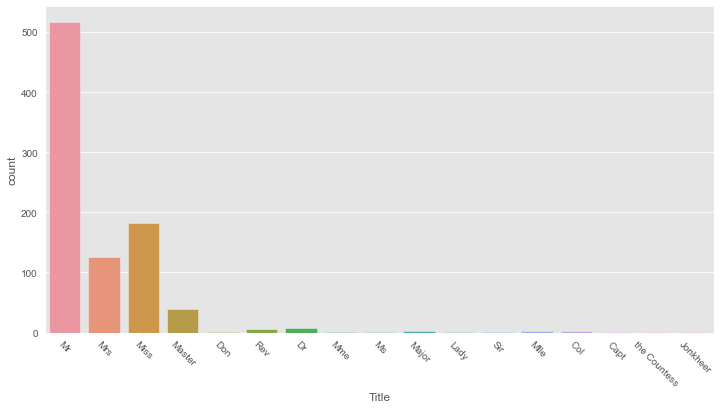

In [22]:
# Extract titles from 'Name' and create 'Title' column
train['Title'] = train['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

# Create a count plot for titles
plt.figure(figsize=(12, 6))
sns.countplot(x='Title', data=train)
plt.xticks(rotation=-45)
plt.show()


# Feature Selection

<Figure size 720x576 with 0 Axes>

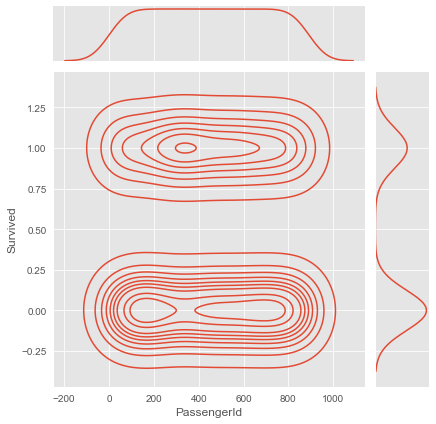

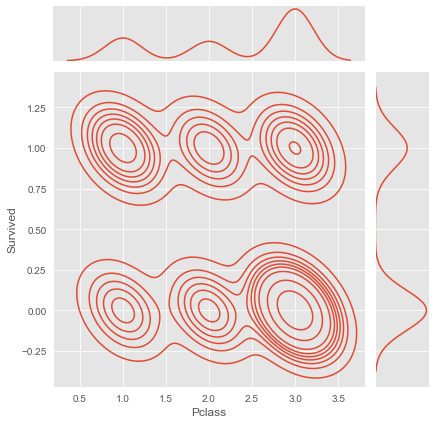

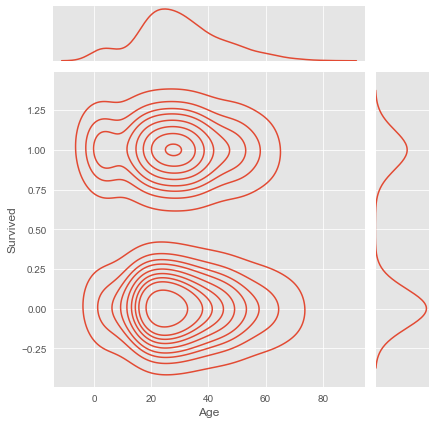

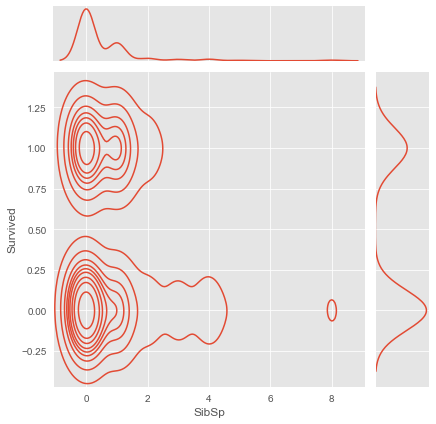

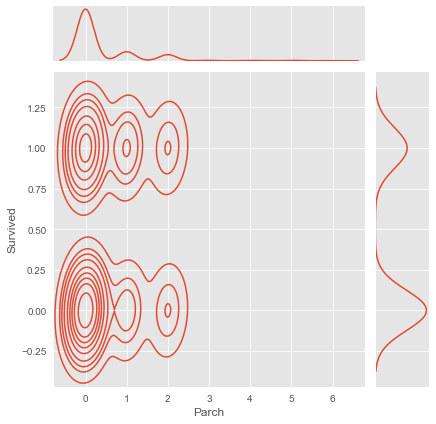

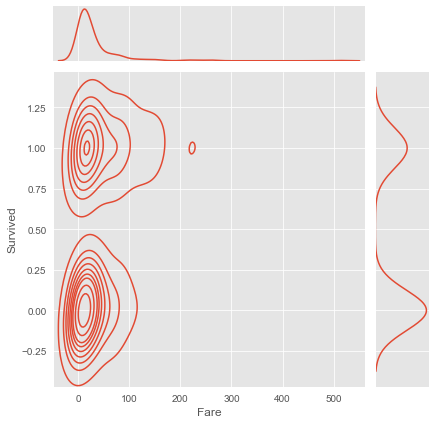

In [29]:
plt.figure(figsize=(10,8))
sns.jointplot(x=train["PassengerId"], y=train["Survived"], kind="kde")
sns.jointplot(x=train["Pclass"], y=train["Survived"], kind="kde")
sns.jointplot(x=train["Age"], y=train["Survived"], kind="kde")
sns.jointplot(x=train["SibSp"], y=train["Survived"], kind="kde")
sns.jointplot(x=train["Parch"], y=train["Survived"], kind="kde")
sns.jointplot(x=train["Fare"], y=train["Survived"], kind="kde")
# sns.jointplot(x=train["FullBath"], y=train["Survived"], kind="kde")
# sns.jointplot(x=train["TotRmsAbvGrd"], y=train["Survived"], kind="kde")
# sns.jointplot(x=train["GarageCars"], y=train["Survived"], kind="kde")
# sns.jointplot(x=train["GarageArea"], y=train["Survived"], kind="kde")
plt.show()